In [12]:
import sqlite3
import pandas as pd
from contextlib import contextmanager
import matplotlib.pyplot as plt
from datetime import datetime
conn = sqlite3.connect('database.sqlite')


With the help of a connection object named conn, the provided code defines a context manager called get cursor that is used
to interact with a database. The team api id for the given team is returned by the get team id function, which accepts a team
name as an argument. The team api id of the team is passed as an input to the get games per season function,
which then produces a pandas DataFrame with the number of games the team played in each season.

The get games per season method receives the team API ID for Arsenal from the get team id function,
which is then called to obtain the total number of games Arsenal has played in a given season.
The console is then output with the resulting DataFrame.

In [13]:
@contextmanager
def get_cursor():
    cursor = conn.cursor()
    try:
        yield cursor
    finally:
        cursor.close()
""" functie die  een context manager definieert genaamd get_cursor om te 
communiceren met een database via een verbinding object conn

args:
----------
cursor: een cursor object om te communiceren met de database via een verbinding object conn.

Yield: cursor object tijdelijk teruggegeven waardoor we een query kunnen uitvoeren op de database.

finally: nadat de code in  yield  uitgevoerd is en wordt de cursor gesloten met de close() methode.

returns: get_cursor
"""
def get_team_id(Arsenal):
    with get_cursor() as cursor:
        cursor.execute("SELECT team_api_id FROM Team WHERE team_long_name=?", (Arsenal,))
        return cursor.fetchone()[0]
"""
functie die het team Retourneert van de team_api_id voor een team met de opgegeven naam in de parameter.

args:
----------
get_cursor: om een database-cursor op te halen en een SQL-query uit te voeren.

cursor.execute: selecteert de rij team_api_id en pakt daar alleen de club die is aangegeven in de parameter.

returns: get_team_id



"""

def get_games_per_season(team_id):
    with get_cursor() as cursor:
        cursor.execute("""SELECT season, COUNT(*) 
                          FROM Match 
                          WHERE (home_team_api_id=? OR away_team_api_id=?) 
                          GROUP BY season""", (team_id, team_id))
        data = cursor.fetchall()
        return pd.DataFrame(data, columns=['Season', 'Games Played'])
"""
functie die Retourneert hoeveel wedstrijden teams spelen per seizoen.

parameters:
---------
cursor.execute: selecteert de seizoenen en tellen hoeveel thuis en uit wedstrijden worden gespeeld,
dat word dan in een groupby gezet zodat er per seizoen  gezien word hoeveel  wedstrijden teams spelen.

data: A database cursor object waaruit de gegevens worden opgehaald.

returns: get_games_per_season  word een Dataframe aangemaakt van data met de columns 'Season', 'Games Played'


"""
    
team_id = get_team_id('Arsenal')
games_per_season = get_games_per_season(team_id)
print(games_per_season)


      Season  Games Played
0  2008/2009            38
1  2009/2010            38
2  2010/2011            38
3  2011/2012            38
4  2012/2013            38
5  2013/2014            38
6  2014/2015            38
7  2015/2016            38


The get_games_per_season_year function retrieves the number of games played by a particular team
in a particular season year from the database. It takes two arguments namely team_id and year.

The function returns a Pandas DataFrame with two columns: 'Season' and 'Games Played', where 'Season'
represents a season the team played in, and 'Games Played' represents the number of games the team played in that season.
In this case, the data of the year 2010 is retrieved for the team with the ID team_id.

In [14]:
def get_games_per_season_year(team_id, year):
    with get_cursor() as cursor:
        cursor.execute("""SELECT season, COUNT(*) 
                          FROM Match 
                          WHERE (home_team_api_id=? OR away_team_api_id=?) 
                          AND strftime('%Y', date) = ? 
                          GROUP BY season""", (team_id, team_id, year))
        data = cursor.fetchall()
        return pd.DataFrame(data, columns=['Season', 'Games Played'])
"""
functie die haalt het aantal wedstrijden dat door een bepaald team in een bepaald seizoensjaar is gespeeld op uit de database.

argumenten:
    team_id (int): De ID van het team waarvoor de gespeelde games moeten worden opgehaald.
    year (int): Het jaar van het seizoen waarvoor de gespeelde wedstrijden moeten worden opgehaald.

returns:
    Een Pandas DataFrame met twee kolommen: 'Seizoen' en 'Games Played', waarbij 'Seizoen' staat voor een seizoen waarin het team speelde, en 'Games Played' staat voor het aantal games dat het team in dat seizoen heeft gespeeld.

Raises:
    Elke fout die optreedt tijdens het uitvoeren van de SQL-query om de gegevens uit de database op te halen.
"""
    
games_per_season_2010 = get_games_per_season_year(team_id, '2010')
print(games_per_season_2010)
    

      Season  Games Played
0  2009/2010            19
1  2010/2011            19


The get_points_per_season function retrieves the total number of points earned by each team in each season of
the Premier League from the database. The function connects to a database and executes a query to select the necessary data.
It utilizes the datetime module to calculate the total time required to execute the query.

The function returns a Pandas DataFrame with three columns: 'team', 'season', and 'points', where 'team'
    represents the name of a team, 'season' represents a season the team played in, and 'points'
    represents the total number of points earned by the team in that season.

In the code block above, the get_points_per_season function is called,
and the resulting DataFrame is assigned to the variable df. A copy of df is then assigned to the variable df2.

In [15]:
pd.set_option('display.max_rows', 500)
def get_points_per_season():
    """
    Returns a pandas DataFrame with the total points earned by each team
    in each season of the Premier League.
    """
    start_time = datetime.now()

    with get_cursor() as cursor:
        query = '''
        SELECT
            t.team_long_name AS team,
            m.season,
            SUM(CASE
                WHEN m.home_team_goal > m.away_team_goal THEN 3
                WHEN m.home_team_goal = m.away_team_goal THEN 1
                ELSE 0
            END) AS points
        FROM match m
        JOIN team t ON t.team_api_id = m.home_team_api_id
        JOIN league l ON l.country_id = m.country_id
        WHERE l.name = 'England Premier League'
        GROUP BY t.team_long_name, m.season
        ORDER BY m.season DESC, points DESC
        '''
        df = pd.read_sql(query, conn)

    end_time = datetime.now()
    total_time = end_time - start_time 
    print(f"Total time taken: {total_time}")

    return df
"""
functie die Haalt het totale aantal punten verdiend door elk team in elk seizoen van de Premier League op uit de database.

args:
---------
De functie maakt verbinding met een database en voert een query uit om de gegevens te selecteren. 
De functie maakt gebruik van de datetime module om de totale tijd te berekenen die nodig is om de query uit te voeren. 

returns:
    Een Pandas DataFrame met drie kolommen: 'team', 'seizoen' en 'punten', waarbij 'team' staat voor de naam van een team, 'seizoen' staat voor een seizoen waarin het team speelde en 'punten' staat voor het totaal aantal punten verdiend door het team in dat seizoen.

raises:
    Elke fout die optreedt tijdens het uitvoeren van de SQL-query om de gegevens uit de database op te halen.
"""
df = get_points_per_season()
df2 = pd.DataFrame(df)
df2

Total time taken: 0:00:00.063343


,team,season,points
0,Leicester City,2015/2016,42
1,Manchester United,2015/2016,41
2,Arsenal,2015/2016,40
3,Manchester City,2015/2016,38
4,Tottenham Hotspur,2015/2016,36
5,Southampton,2015/2016,36
6,West Ham United,2015/2016,34
7,Liverpool,2015/2016,32
8,Swansea City,2015/2016,30
9,Stoke City,2015/2016,28


The code creates a dataframe called arsenal_df that contains data for the team "Arsenal". Then, 
the data is grouped by season and the total points for each season are calculated using the sum method.
The resulting dataframe is sorted by season in descending order using the sort_values method.

Next, a new column called "rank" is added to the  dataframe using the rank method,
which assigns a rank to each season based on the total points. The dense method is used to handle ties in the ranking.

the resulting dataframe is printed to the console,
showing the total points and rank for each season in which Arsenal played.

In [16]:
arsenal_df = df[df['team'] == 'Arsenal']
arsenal_grouped = arsenal_df.groupby('season').agg({'points': 'sum'})
arsenal_grouped_sorted = arsenal_grouped.sort_values(by='season', ascending=False)
arsenal_grouped_sorted['rank'] = arsenal_grouped_sorted['points'].rank(method='dense', ascending=False)
print(arsenal_grouped_sorted)



           points  rank
season                 
2015/2016      40   4.0
2014/2015      41   3.0
2013/2014      44   2.0
2012/2013      38   5.0
2011/2012      40   4.0
2010/2011      37   6.0
2009/2010      47   1.0
2008/2009      38   5.0


The code reads data from a database and creates two pandas DataFrames.

The first DataFrame, named 'points_df', calculates the total number of points for each team in
a football league based on their game results. It then groups the results by team name to get the total points per team.

The second DataFrame, named 'team_props_df', fetches team information from the 'Team' table in the database,
including the team's full name, short name, FIFA API ID, and team API ID.

The code then merges the two DataFrames on the 'team_long_name' column to create a final DataFrame named 'merged_df'.

Overall, the code provides useful insights into the performance of football teams in a league and
their corresponding team information.

In [26]:
points_df = pd.read_sql_query(
'''SELECT team_long_name, 
SUM(points) AS total_points 
FROM (SELECT team_long_name, 
CASE WHEN home_team_goal > away_team_goal 
THEN 3 WHEN home_team_goal = away_team_goal 
THEN 1 ELSE 0 END AS points FROM Match JOIN Team ON Match.home_team_api_id = Team.team_api_id) 
GROUP BY team_long_name''', conn)

team_props_df = pd.read_sql_query(
'''SELECT team_long_name, team_short_name, team_fifa_api_id, team_api_id 
FROM Team''', conn)
"""
De code leest gegevens uit een database en en maakt twee pandas DataFrames aan.

args:
-----
Het doet dit door een query uit te voeren die het totaal aantal punten voor elke wedstrijd berekent 
(3 punten voor winst, 1 punt voor een gelijkspel, 0 punten voor een verlies) en deze vervolgens groepeert op teamnaam om het 
totale aantal punten per team te krijgen.

Het tweede DataFrame, genaamd 'team_props_df', haalt teamgegevens op uit de Team-tabel in de database, waaronder de teamnaam, verkorte naam, FIFA API ID en team API ID.

returns:team_props_df, points_df
"""
merged_df = pd.merge(points_df, team_props_df, on='team_long_name')
merged_df

,team_long_name,total_points,team_short_name,team_fifa_api_id,team_api_id
0,1. FC Kaiserslautern,35,KAI,29.0,8350
1,1. FC Köln,127,FCK,31.0,8722
2,1. FC Nürnberg,111,NUR,171.0,8165
3,1. FSV Mainz 05,194,MAI,169.0,9905
4,AC Ajaccio,67,AJA,614.0,8576
5,AC Arles-Avignon,12,ARL,111989.0,108893
6,AC Bellinzona,64,BEL,1714.0,6493
7,ADO Den Haag,189,HAA,650.0,10217
8,AJ Auxerre,120,AUX,57.0,8583
9,AS Monaco,198,MON,69.0,9829


The code reads data from a database and creates three pandas DataFrames.

The first DataFrame, named 'team_attributes_df', fetches team attributes from the 'Team_Attributes' table in the database, including the team API ID, average build-up play speed, chance creation passing, and defence pressure. It then groups the results by team API ID to get the average attributes per team.

The second DataFrame, named 'points_df', calculates the total number of points for each team in a soccer league based on their game results . It then groups the results by team name to get the total points per team.

The third DataFrame, named 'team_props_df', fetches team information from the 'Team' table in the database, including the team's full name, short name, FIFA API ID, and team API ID.

The code then merges the three DataFrames on the 'team_api_id' and 'team_long_name' columns to create a final DataFrame named 'merged_df', which contains team performance metrics, team information, and team attributes.

Overall, the code provides a comprehensive overview of team performance and attributes in a football league, which could be used for further analysis and decision-making.

In [19]:
team_attributes_df = pd.read_sql_query(
    '''
    SELECT team_api_id, 
           AVG(BuildUpPlaySpeed) AS BuildUpPlaySpeed,
           AVG(ChanceCreationPassing) AS ChanceCreationPassing,
           AVG(DefencePressure) AS DefencePressure
    FROM Team_Attributes
    GROUP BY team_api_id
    ''', conn)

merged_df = pd.merge(points_df, team_props_df, on='team_long_name')
merged_df = pd.merge(merged_df, team_attributes_df, on='team_api_id')
merged_df.head(1)

,team_long_name,total_points,team_short_name,team_fifa_api_id,team_api_id,BuildUpPlaySpeed,ChanceCreationPassing,DefencePressure
0,1. FC Kaiserslautern,35,KAI,29.0,8350,51.166667,47.166667,46.833333


Total Points vs Defence Pressure
De scatter plot laat zien dat de stippen heel erg verdeeld zijn daaraan kan je zien dat de correlatie tussen punten en verdegings druk laag is toch zie je een stijgende lijn in de scatterplot.


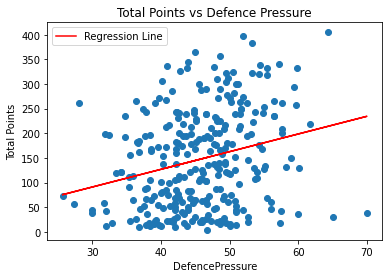

In [20]:
# eerste visualisatie
import numpy as np
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(merged_df['DefencePressure'], merged_df['total_points'])
line = slope * merged_df['DefencePressure'] + intercept

plt.scatter(merged_df['DefencePressure'], merged_df['total_points'])
plt.plot(merged_df['DefencePressure'], line, color='red', label='Regression Line')
plt.xlabel('DefencePressure')
plt.ylabel('Total Points')
plt.title('Total Points vs Defence Pressure')
plt.legend()
plt.show()



BuildUpPlaySpeed vs punten
De scatter plot laat zien dat de stippen heel erg verdeeld zijn daaraan kan je zien dat de correlatie tussen punten en opbouw snelheid heellaag is toch zie je dat er lage positieve realtie is tussen punten en opbouw snelheid  dat kan je zien dat er rechts boven de meeste blauwe punten zitten.


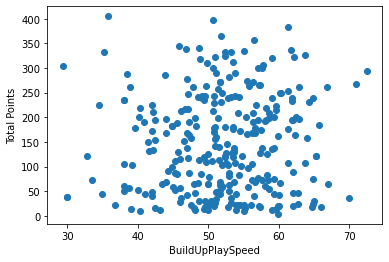

In [21]:
# BuildUpPlaySpeed
import matplotlib.pyplot as plt

plt.scatter(merged_df['BuildUpPlaySpeed'], merged_df['total_points'])
plt.xlabel('BuildUpPlaySpeed')
plt.ylabel('Total Points')
plt.show()


Correlation Heatmap - Total Points and Chance Creation Passing
Deze heatmap geeft correlatie weer aan kleuren hoe roder hoe positiever de corelatie en hoe blauwer hoe negatiever de correaltie
Chance Creation Passing heeft 0.16 correlatie wat betekent dat Chance Creation Passing lage invloed heeft op hoeveel punten je haalt.


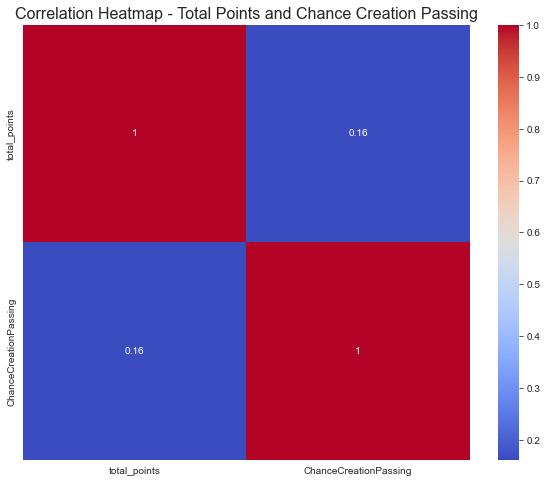

In [22]:
# Correlation Heatmap - Total Points and Chance Creation Passing
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(merged_df[['total_points', 'ChanceCreationPassing']].corr(), cmap='coolwarm', annot=True)

# Set title
plt.title('Correlation Heatmap - Total Points and Chance Creation Passing', fontsize=16)

# Show plot
plt.show()





Correlation Heatmap geeft een overzicht van alle correlatie van het dataframe.

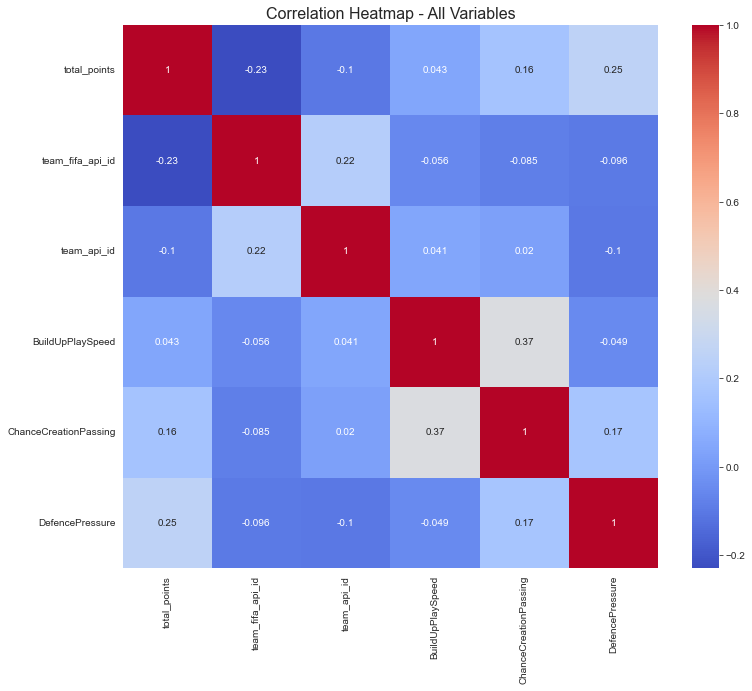

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

# Create correlation matrix
corr_matrix = merged_df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Set title
plt.title('Correlation Heatmap - All Variables', fontsize=16)

# Show plot
plt.show()
